In [4]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [67]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNEL=3
EPOCHS=50

In [8]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVIllage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 4500 files belonging to 3 classes.


In [12]:
class_names=dataset.class_names
class_names

['Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_healthy']

In [13]:
len(dataset)

141

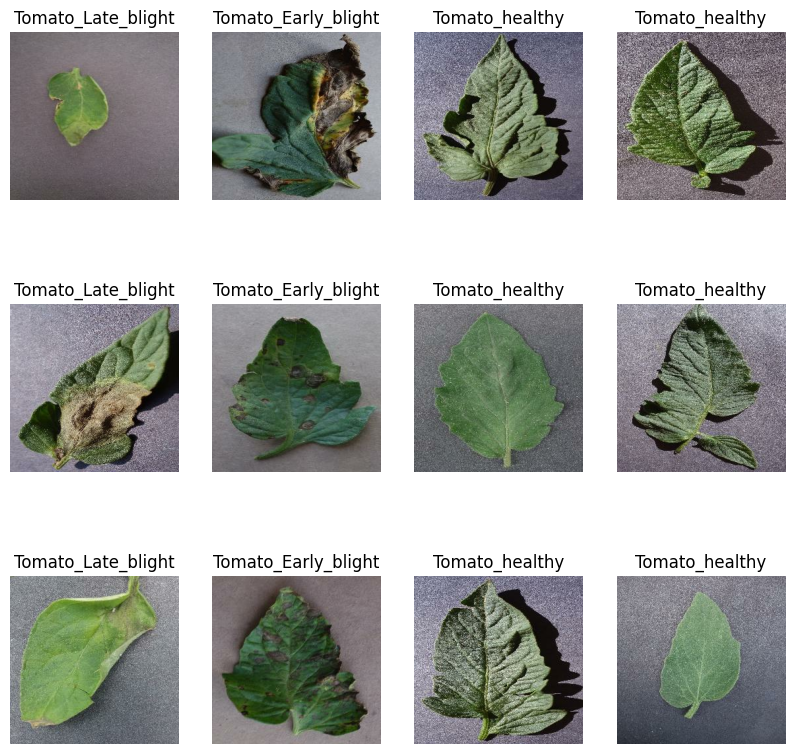

In [27]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
        

In [28]:
len(dataset) #4500/32

141

In [ ]:
80%==>training
20%==>10% validation,10% test

In [30]:
train_size=0.8
len(dataset)*train_size

112.80000000000001

In [44]:
train_ds=dataset.take(112)
len(train_ds)

112

In [45]:
test_ds=dataset.skip(112)
len(test_ds)

29

In [46]:
val_size=0.1
len(dataset)*val_size

14.100000000000001

In [47]:
val_ds=test_ds.take(14)
len(val_ds)

14

In [48]:
test_ds=test_ds.skip(14)
len(test_ds)

15

In [51]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)

    
    train_size=int(train_split*ds_size)

    val_size=int(val_split*ds_size)

    train_ds=ds.take(train_size)

    val_ds=ds.skip(train_size).take(val_size)

    test_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds

In [52]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [53]:
len(train_ds)

112

In [54]:
len(val_ds)

14

In [55]:
len(test_ds)

15

In [56]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [57]:
resize_and_rescale= tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [58]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNEL)
n_classes=3
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
])

model.build(input_shape=input_shape)

In [ ]:
model.summary()

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [69]:
history=model.fit(
        train_ds,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        verbose=1,
        validation_data=val_ds
    )

Epoch 1/50
112/112 [==============================] - 273s 2s/step - loss: 0.4205 - accuracy: 0.8217 - val_loss: 0.4211 - val_accuracy: 0.8326
Epoch 2/50
112/112 [==============================] - 283s 3s/step - loss: 0.3132 - accuracy: 0.8709 - val_loss: 0.3985 - val_accuracy: 0.8460
Epoch 3/50
112/112 [==============================] - 278s 2s/step - loss: 0.3284 - accuracy: 0.8625 - val_loss: 0.7969 - val_accuracy: 0.6853
Epoch 4/50
112/112 [==============================] - 284s 3s/step - loss: 0.3352 - accuracy: 0.8628 - val_loss: 0.4194 - val_accuracy: 0.8326
Epoch 5/50
112/112 [==============================] - 277s 2s/step - loss: 0.2650 - accuracy: 0.8852 - val_loss: 0.2629 - val_accuracy: 0.8839
Epoch 6/50
112/112 [==============================] - 275s 2s/step - loss: 0.2395 - accuracy: 0.9023 - val_loss: 0.3936 - val_accuracy: 0.8438
Epoch 7/50
112/112 [==============================] - 286s 3s/step - loss: 0.2282 - accuracy: 0.9107 - val_loss: 0.6211 - val_accuracy: 0.7924

In [71]:
scores = model.evaluate(test_ds)

15/15 [==============================] - 8s 534ms/step - loss: 0.1405 - accuracy: 0.9479


In [72]:
scores

[0.1404617577791214, 0.9479166865348816]

In [73]:
history 

In [74]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 112}

In [75]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [78]:
history.history['accuracy']

[0.8216685056686401,
 0.870940625667572,
 0.8625419735908508,
 0.8628219366073608,
 0.8852183818817139,
 0.9022956490516663,
 0.9106943011283875,
 0.8779395222663879,
 0.9076147675514221,
 0.9269316792488098,
 0.9059350490570068,
 0.9020156860351562,
 0.921612560749054,
 0.9406495094299316,
 0.9409294724464417,
 0.9118140935897827,
 0.913773775100708,
 0.935890257358551,
 0.9470884799957275,
 0.9515677690505981,
 0.9526875615119934,
 0.943169116973877,
 0.9440089464187622,
 0.914053738117218,
 0.7835946083068848,
 0.8538633584976196,
 0.8874580264091492,
 0.9017357230186462,
 0.9084546566009521,
 0.9263717532157898,
 0.9123740196228027,
 0.9118140935897827,
 0.9384098649024963,
 0.9386898279190063,
 0.9258118867874146,
 0.9496080875396729,
 0.957446813583374,
 0.956326961517334,
 0.9608062505722046,
 0.9372900128364563,
 0.956326961517334,
 0.9636058211326599,
 0.9652855396270752,
 0.9596864581108093,
 0.9675251841545105,
 0.9644457101821899,
 0.9616461396217346,
 0.9641657471656799,
 

In [79]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

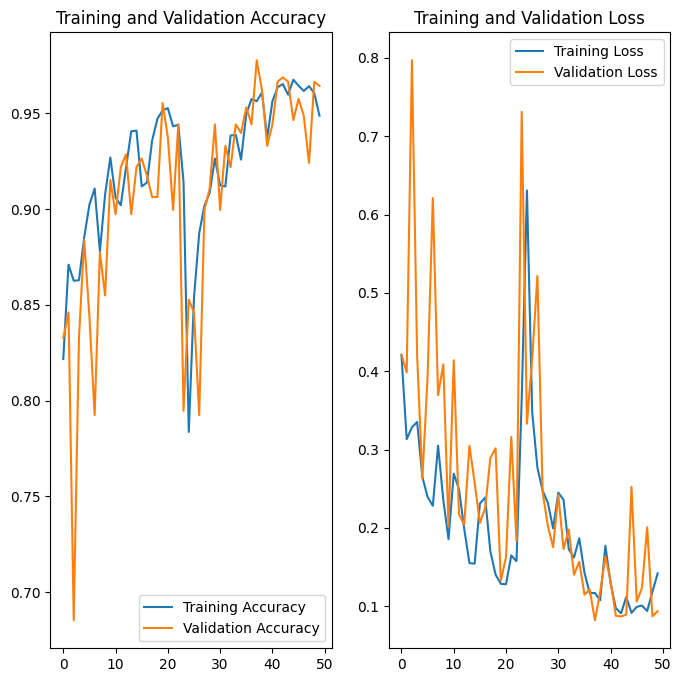

In [84]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

first image to predict
first image actual label: Tomato_healthy
1/1 [==============================] - 1s 576ms/step
predicted label: Tomato_healthy


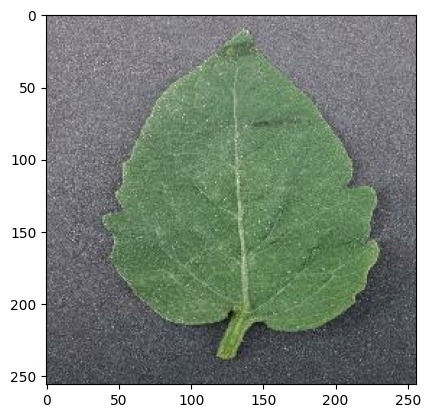

In [107]:
import numpy as np
for images_batch,labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print('first image to predict')
    plt.imshow(first_image)
    print("first image actual label:",class_names[first_label])

    batch_prediction=model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [112]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)

    predictions=model.predict(img_array)

    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 [==============================] - 0s 47ms/step


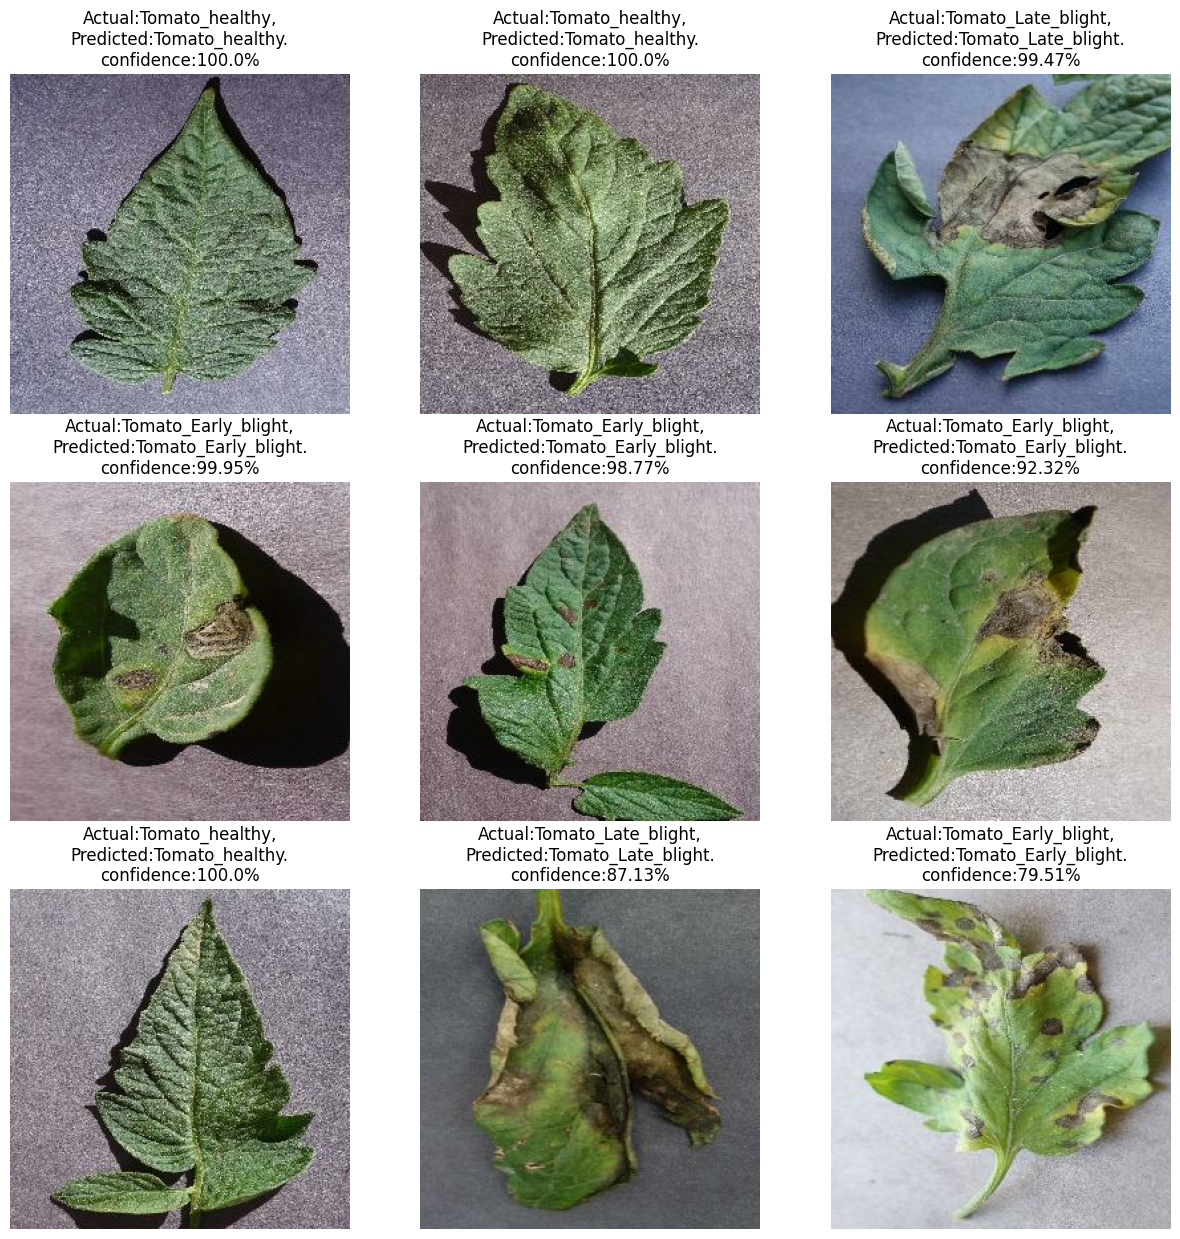

In [117]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class=class_names[labels[i]]

        plt.title(f"Actual:{actual_class},\nPredicted:{predicted_class}.\nconfidence:{confidence}%")
        plt.axis("off")

In [116]:
model_version=1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets
